# $\fbox{1-1}$「日本版死亡データベース」の利用

## 本書で使う公的統計（出生比率・死亡率）

## 年齢の定義

In [1]:
# グラフを移動拡大縮小したい場合
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 表示する行の数を設定
pd.options.display.max_rows = 6

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

<IPython.core.display.Javascript object>


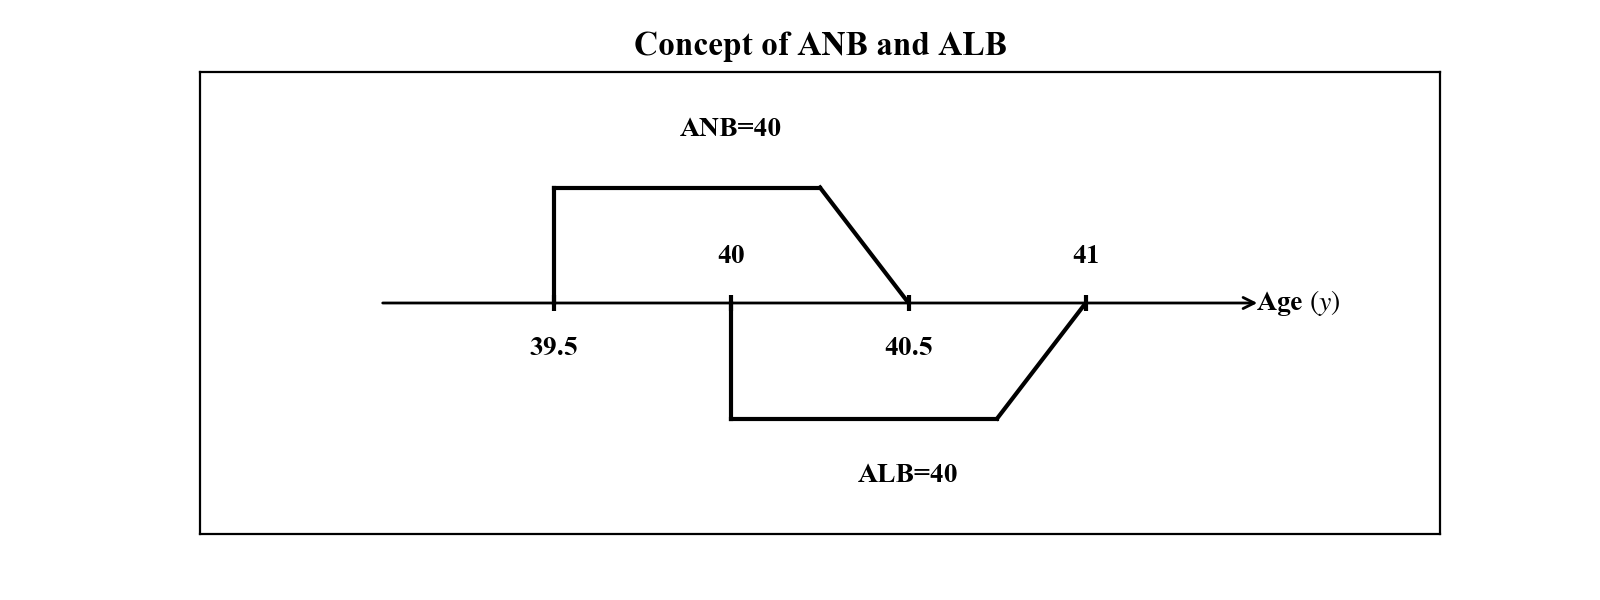

Text(0.5, 1.0, 'Concept of ANB and ALB')

In [2]:
# ALB と ANB の違いの概念図

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
ax.annotate(s='', xytext=[39, 0], xy=[41.5, 0],
            arrowprops=dict(arrowstyle='->', color='k'))
ax.text(41.6, 0, r'Age $(y)$', va='center', ha='center')

# ANB
ax.plot([39.5, 40.25], [0.5, 0.5], c='k')
ax.plot([39.5, 39.5], [0, 0.5], c='k')
ax.plot([40.25, 40.5], [0.5, 0], c='k')
ax.text(40, 0.75, 'ANB=40', va='center', ha='center')

# ALB
ax.plot([40, 40.75], [-0.5, -0.5], c='k')
ax.plot([40, 40], [0, -0.5], c='k')
ax.plot([40.75, 41], [-0.5, 0], c='k')
ax.text(40.5, -0.75, 'ALB=40', va='center', ha='center')

# Age
ax.text(39.5, -0.2, '39.5', va='center', ha='center')
ax.text(40,    0.2, '40',   va='center', ha='center')
ax.text(40.5, -0.2, '40.5', va='center', ha='center')
ax.text(41,    0.2, '41',   va='center', ha='center')
X = np.arange(4) / 2 + 39.5
Y = np.zeros(4)
ax.scatter(X, Y, c='k', marker='|')

ax.set_xlim(38.5, 42)
ax.set_xticklabels('')
ax.set_ylim(-1, 1)
ax.set_yticklabels('')
ax.tick_params(top=False, bottom=False, left=False, right=False)
ax.set_title('Concept of ANB and ALB')

## 出生比率

### 読み込みと整形

In [3]:
url = 'http://www.ipss.go.jp/p-toukei/JMD/00/STATS/Births.txt'

df_birth = pd.read_csv(url, skiprows=1, delim_whitespace=True)

df_birth

,Year,Female,Male,Total
0,1947,1301806,1376986,2678792
1,1948,1303060,1378564,2681624
2,1949,1316630,1380008,2696638
...,...,...,...,...
67,2014,488006,515533,1003539
68,2015,490225,515452,1005677
69,2016,475098,501880,976978


In [4]:
# 女性
df_birth_F = df_birth[['Year', 'Female']].copy()
df_birth_F.columns = ['year', 'l'] # l は life(生存者数) の頭文字
df_birth_F['sex'] = 'F'
# 男性
df_birth_M = df_birth[['Year', 'Male']].copy()
df_birth_M.columns = ['year', 'l']
df_birth_M['sex'] = 'M'
# 縦方向に結合
df_birth = pd.concat([df_birth_F, df_birth_M], axis=0,
                     ignore_index=True) 

df_birth

,year,l,sex
0,1947,1301806,F
1,1948,1303060,F
2,1949,1316630,F
...,...,...,...
137,2014,515533,M
138,2015,515452,M
139,2016,501880,M


In [5]:
df_birth['ratio'] = df_birth['l'] / df_birth['l'].sum()
df_birth['cum_ratio'] = df_birth['ratio'].cumsum()
del df_birth['l']

df_birth

,year,sex,ratio,cum_ratio
0,1947,F,0.012150,0.012150
1,1948,F,0.012162,0.024311
2,1949,F,0.012288,0.036600
...,...,...,...,...
137,2014,M,0.004812,0.990505
138,2015,M,0.004811,0.995316
139,2016,M,0.004684,1.000000


In [6]:
df_birth.to_csv('./public_stats/processed/ipss_birth.csv', index=False)

In [7]:
df_birth2 = pd.read_csv('./public_stats/processed/ipss_birth.csv')

df_birth2

,year,sex,ratio,cum_ratio
0,1947,F,0.012150,0.012150
1,1948,F,0.012162,0.024311
2,1949,F,0.012288,0.036600
...,...,...,...,...
137,2014,M,0.004812,0.990505
138,2015,M,0.004811,0.995316
139,2016,M,0.004684,1.000000


### 乱数を利用したデータの生成方法

<IPython.core.display.Javascript object>


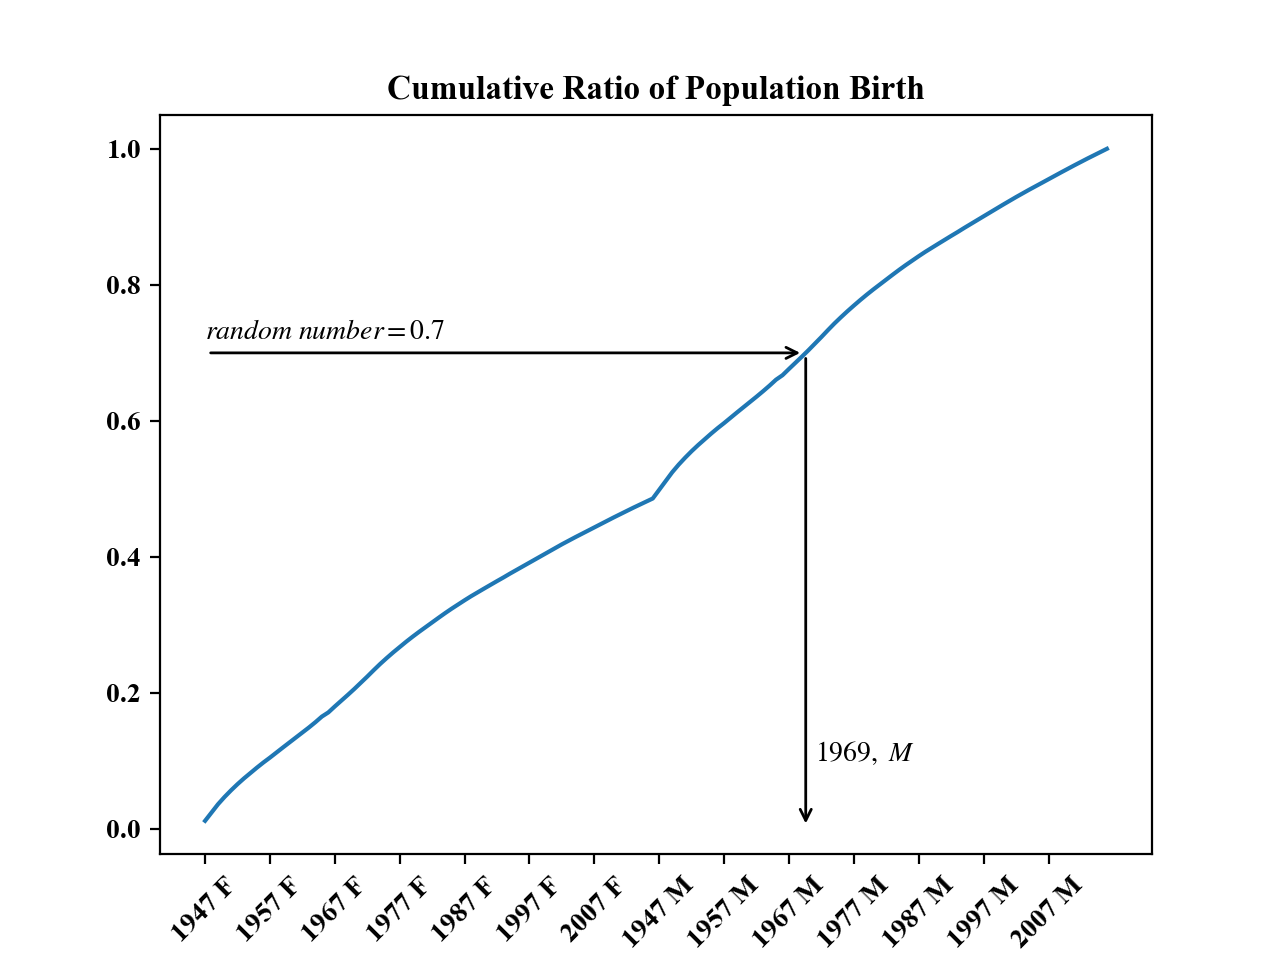

Text(0.5, 1.0, 'Cumulative Ratio of Population Birth')

In [8]:
# 累積比率と一様乱数を使った、男女別・誕生年別の割合の作成方法の概念図

fig = plt.figure()
ax = fig.add_subplot(111)
# 折れ線
x = df_birth.index
y = df_birth['cum_ratio']
ax.plot(x, y)
xlabels = df_birth['year'].apply(str) + ' ' + df_birth['sex']
ax.set_xticks(x[::10])
ax.set_xticklabels(xlabels[::10], rotation='45')
# 水平矢印
ax.annotate(s='', xytext=[0, 0.7], xy=[92.57888, 0.7],
            arrowprops=dict(arrowstyle='->', color='k'))
# 垂直矢印
ax.annotate(s='', xytext=[92.57888, 0.7], xy=[92.57888, 0],
            arrowprops=dict(arrowstyle='->', color='k'))
# テキスト
ax.text(x=0, y=0.72, s='$random\ number=0.7$')
ax.text(x=94, y=0.1, s='$1969,\ M$')
# タイトル
ax.set_title('Cumulative Ratio of Population Birth')

## 月次死亡率

### 年次発生率 vs. 月次発生率

### 読み込みと整形

In [9]:
url = 'http://www.ipss.go.jp/p-toukei/JMD/00/STATS/Mx_1x1.txt'
df_mortality = pd.read_csv(url, skiprows=1, delim_whitespace=True)

df_mortality

,Year,Age,Female,Male,Total
0,1947,0,0.087401,0.099181,0.093432
1,1947,1,0.033723,0.034697,0.034220
2,1947,2,0.016994,0.016804,0.016897
...,...,...,...,...,...
7767,2016,108,0.596024,0.874743,0.620184
7768,2016,109,0.667530,0.992392,0.693017
7769,2016,110+,0.700973,1.234568,0.732173


In [10]:
df_mortality.dtypes

Year       int64
Age       object
Female    object
Male      object
Total     object
dtype: object

In [11]:
df_mortality = df_mortality[df_mortality['Year'] == 2016].copy()
df_mortality['Age'].replace('110+', '110', inplace=True)
dict_types = {'Year': 'int16', 'Age': 'int8', 'Female': 'float64',
              'Male': 'float64', 'Total': 'float64'}
df_mortality = df_mortality.astype(dict_types)

df_mortality.dtypes

Year        int16
Age          int8
Female    float64
Male      float64
Total     float64
dtype: object

In [12]:
df_mortality

,Year,Age,Female,Male,Total
7659,2016,0,0.002028,0.001995,0.002011
7660,2016,1,0.000313,0.000340,0.000326
7661,2016,2,0.000174,0.000178,0.000176
...,...,...,...,...,...
7767,2016,108,0.596024,0.874743,0.620184
7768,2016,109,0.667530,0.992392,0.693017
7769,2016,110,0.700973,1.234568,0.732173


In [13]:
del df_mortality['Year']
del df_mortality['Total']
df_mortality.columns = ['anb', 'F', 'M']

df_mortality

,anb,F,M
7659,0,0.002028,0.001995
7660,1,0.000313,0.000340
7661,2,0.000174,0.000178
...,...,...,...
7767,108,0.596024,0.874743
7768,109,0.667530,0.992392
7769,110,0.700973,1.234568


In [14]:
df_mortality['F'] = (df_mortality['F'] + df_mortality['F'].shift(-1))/2
df_mortality['M'] = (df_mortality['M'] + df_mortality['M'].shift(-1))/2
df_mortality.columns = ['alb', 'F', 'M']

df_mortality

,alb,F,M
7659,0,0.001170,0.001167
7660,1,0.000244,0.000259
7661,2,0.000136,0.000155
...,...,...,...
7767,108,0.631777,0.933568
7768,109,0.684252,1.113480
7769,110,NaN,NaN


<IPython.core.display.Javascript object>


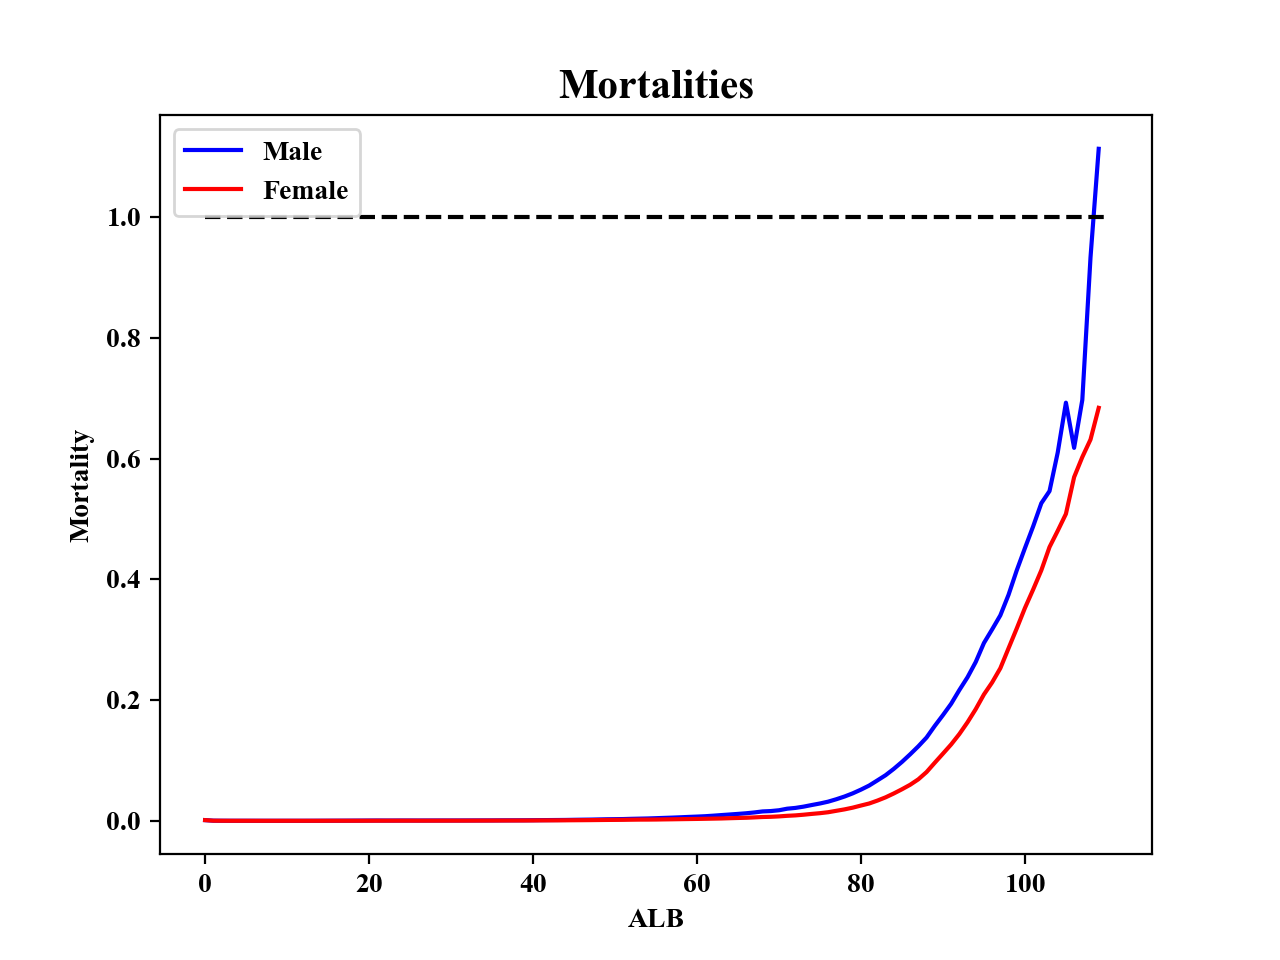

Text(0.5, 1.0, 'Mortalities')

In [15]:
# 年齢別死亡率を可視化

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_mortality.alb, df_mortality.M, c='b', label='Male')
ax.plot(df_mortality.alb, df_mortality.F, c='r', label='Female')
ax.plot([0, 110], [1, 1], c='k', ls='--')
ax.set_xlabel('ALB')
ax.set_ylabel('Mortality')
ax.legend(loc='best')
ax.set_title('Mortalities', fontsize=15)

In [16]:
df_mortality = df_mortality[df_mortality['alb'] < 100].copy()

df_mortality

,alb,F,M
7659,0,0.001170,0.001167
7660,1,0.000244,0.000259
7661,2,0.000136,0.000155
...,...,...,...
7756,97,0.252797,0.340451
7757,98,0.285820,0.374441
7758,99,0.318682,0.414901


In [17]:
df_mortality.loc[:, 'F'] = 1 - (1 - df_mortality['F'])**(1/12)
df_mortality.loc[:, 'M'] = 1 - (1 - df_mortality['M'])**(1/12)

df_mortality

,alb,F,M
7659,0,0.000098,0.000097
7660,1,0.000020,0.000022
7661,2,0.000011,0.000013
...,...,...,...
7756,97,0.023992,0.034089
7757,98,0.027662,0.038338
7758,99,0.031471,0.043682


In [18]:
df_mortality.to_csv('./public_stats/processed/ipss_mortality.csv', index=False)

## まとめ